# Assignment 10

### 1.复习上课内容

### 2. 回答一下理论题目

#### 1. What is independent assumption in Naive bayes ?

$P(Y=c_k|X) = \frac{P(Y=c_k, X)}{P(X)} = \frac{P(Y=c_k)P(X|Y=c_k)}{P(X)}$

$P(X|Y=c_k) = P(x^1, x^2, ..., x^n| Y=c_k)$，但很难求$P(x^1, x^2, ..., x^n|Y)$的概率，**假设条件度独立**，概率则简化为$P(X|Y=c_k) = P(x^1|Y=c_k)P(x^2|Y=c_k)...P(x^n|Y=c_k)$

为了计算概率$P(x^1, x^2, ...., x^n|Y=c_k)$，贝叶斯做了条件独立性$P(A,B|C)=P(A|C)P(B|C)$的假设。

#### 2. What is MAP(maximum a posterior) and ML(maximum likelihood) ?

MAP

$h_{MAP} = \arg\max\limits_{h \in H} {P(h|D)}
= \arg\max\limits_{h \in H} \frac{P(h)P(D|h)}{P(D)} 
= \arg\max\limits_{h \in H} P(h)P(D|h)$

MAP由贝叶斯公式$P(B|A) = \frac{P(B)P(A|B)}{P(A)}$推导而来，$P(h)$是先验概率，$P(D|h)*P(h)$在先验概率下，最有可能出现的概率。

ML

$h_{ML} = \arg\max\limits_{h \in H} P(D|h)$

与MAP不同，ML假设$P(h)$是相同的，是一个常数。

#### 3. What is support vector in SVM?

与分离超平面距离最近的样本点称为支持向量，支持向量是使得约束条件$y_i(x_i*w + b) -1 = 0$等号成立的点。支持向量决定了超平面的参数。

#### 4. What is the intuition behind SVM ?

当数据线性可分时，找一个平面能够分离正负样本，并且使分离间隔最大化。对于数据线性不可分时，通过kernel trick将输入数据映射到更高维空间，在高维空间学习一个线性分类器。

#### 5. Shortly describ what 'random' means in random forest ?

* 随机选择k个样本
* 随机选择t个特征

#### 6. What criterion does XGBoost use to find the best split point in a tree ?

目标函数$Obj = \sum_\limits{i} l(y, \hat y_i) + \sum_\limits{k} \Omega(f_t)$，
其中正则项$\Omega(f) = \gamma T+\frac{1}{2}||w||^2$ 

求的$f_t$使得目标函数$Obj$最小

$L_{split} = \frac{1}{2} [\frac{(\sum_{i \in I_L} g_i)^2}{\sum_{i \in I_L}{h_i} + \lambda} + 
\frac{(\sum_{i \in I_R} g_i)^2}{\sum_{i \in I_R}{h_i} + \lambda} -
\frac{(\sum_{i \in I} g_i)^2}{\sum_{i \in I}{h_i} + \lambda}] - 
\gamma$

### 3. Practial part

##### Problem description: In this part you are going to build a classifier to detect if a piece of news is published by the Xinhua news agency (新华社）.

#### Hints:

###### 1. Firstly, you have to come up with a way to represent the news. (Vectorize the sentence, you can find different ways to do so online)  

###### 2. Secondly,  pick a machine learning algorithm that you think is suitable for this task

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

In [8]:
news_df = pd.read_csv('news.csv')

In [32]:
news_df.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\n至于...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\n@深圳交警微博称：昨日清晨交...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [28]:
# news source category

len(set(news_df['source']))

975

In [31]:
# 新华社新闻

news_df[news_df.source=='新华社'].head()

,id,author,source,content,feature,title,url
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
39,89578,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态,http://world.huanqiu.com/hot/2017-06/10866229....
95,89522,NaN,新华社,新华社韩国济州6月18日电综述：亚投行第二届年会三大亮点\n新华社记者 耿学鹏 严蕾\n亚洲...,"{""type"":""国内新闻"",""site"":""环球"",""commentNum"":""0"",""j...",综述：亚投行第二届年会三大亮点,http://china.huanqiu.com/hot/2017-06/10866439....
113,89504,NaN,新华社,新华社北京6月18日电 经军委领导批准，《军营理论热点怎么看·2017》日前印发全军。\n为...,"{""type"":""国内新闻"",""site"":""环球"",""commentNum"":""0"",""j...",《军营理论热点怎么看·2017》印发全军,http://china.huanqiu.com/hot/2017-06/10866447....
305,89312,NaN,新华社,新华社兰州6月19日电（记者张钦）记者19日了解到，刚刚出台的《甘肃省网络扶贫行动的实施方案...,"{""type"":""国内新闻"",""site"":""环球"",""commentNum"":""0"",""j...",甘肃力推网络扶贫：贫困山区到2020年实现4G网络全覆盖,http://china.huanqiu.com/hot/2017-06/10866626....


#### Data Preprocessing

In [36]:
dataset = news_df[['source', 'content', 'title']]

In [38]:
dataset.head()

,source,content,title
0,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,小米MIUI 9首批机型曝光：共计15款
1,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,骁龙835在Windows 10上的性能表现有望改善
2,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\n至于...,一加手机5细节曝光：3300mAh、充半小时用1天
3,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\n,葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）
4,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\n@深圳交警微博称：昨日清晨交...,44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随


In [82]:
dataset.shape

(89611, 4)

In [103]:
# add label column

dataset['label'] = dataset.apply(lambda row: row.source == '新华社', axis=1)

dataset = dataset.astype({'label': int})

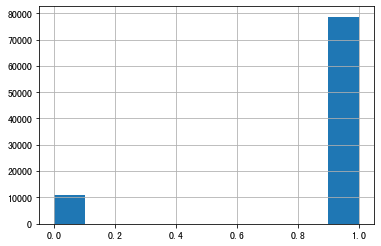

In [104]:
dataset['label'].hist()

In [106]:
dataset.head()

,source,content,title,label
0,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,小米MIUI 9首批机型曝光：共计15款,0
1,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,骁龙835在Windows 10上的性能表现有望改善,0
2,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\n至于...,一加手机5细节曝光：3300mAh、充半小时用1天,0
3,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\n,葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,1
4,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\n@深圳交警微博称：昨日清晨交...,44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,0


In [150]:
dataset[dataset.label==1].head(500)[['source', 'content']]

,source,content
3,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\n
39,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\n
95,新华社,新华社韩国济州6月18日电综述：亚投行第二届年会三大亮点\n新华社记者 耿学鹏 严蕾\n亚洲...
113,新华社,新华社北京6月18日电 经军委领导批准，《军营理论热点怎么看·2017》日前印发全军。\n为...
305,新华社,新华社兰州6月19日电（记者张钦）记者19日了解到，刚刚出台的《甘肃省网络扶贫行动的实施方案...
312,新华社,新华社乌鲁木齐6月18日电（记者杜刚、王秉阳）6月18日，新疆天山天池首次举办山地马拉松比赛...
314,新华社,新华社北京6月19日电（记者熊丰）记者从公安部消防局获悉，19日上午6时，由公安部消防局组织...
543,新华社,暑期旅游旺季是各大旅游景区开门迎客的好时机。然而，有5家5A级景区却高兴不起来：国家旅游...
545,新华社,新华社北京6月20日电 总部设在德国波恩的国际残奥委会在当地时间19日宣布，中国残联主席...
651,新华社,新华社南京4月17日电(记者潘晔)江苏拥有不少5A景区。日前，一份来自清华大学的第三方调...


In [219]:
import jieba
import gensim
import pandas as pd

In [221]:
def tokenize(s):
    return list(jieba.cut(s))

In [227]:
def gen_corpus(filepath, num=-1):
    news_df = pd.read_csv('news.csv')

    with open(filepath, 'w') as f:
        counter = 0
        for content in news_df['content'].astype(str):
            tokens = tokenize(content)
            f.write(' '.join(tokens).replace('\n', '').strip() + '\n')

            counter += 1
            if num > 0 and counter >= num:
                break

    return None

In [228]:
gen_corpus('news_corpus.txt')

In [229]:
len(dataset['content'])

89611

In [230]:
!cat news_corpus.txt | wc -l

   89611


#### Embedding

In [242]:
import gensim

In [269]:
def read_corpus(fname, sampling=-1):
    with open(fname) as f:
        for i, line in enumerate(f):
            if sampling > 0 and i >= sampling:
                return

            tokens = gensim.utils.simple_preprocess(line)
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])


In [271]:
len(list(read_corpus('news_corpus.txt', 100)))

100

In [325]:

def doc_embedding(corpus_fname, embedd_model_fname, vector_size=100, sampling=-1):
    corpus_docs = list(read_corpus(corpus_fname, sampling))
    model = gensim.models.doc2vec.Doc2Vec(vector_size=vector_size)
    model.build_vocab(corpus_docs)
    model.train(corpus_docs, total_examples=model.corpus_count, epochs=model.epochs)
    model.save(embedd_model_fname+'.model')
    model.docvecs.save_word2vec_format(embedd_model_fname+'.dv')

    return model


In [326]:
# doc_embedding('news_corpus.txt', 'doc2vec_{}'.format(int(time.time())))

#### Model

##### Building Dataset

In [4]:
import joblib
import numpy as np
import xgboost as xgb
from sklearn import svm
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.datasets import load_iris, load_digits, load_boston

from sklearn.metrics import plot_confusion_matrix

In [5]:
import numpy as np
import pandas as pd


def build_dataset(doc_embedd, news_dataset):

    doc_indexes = []
    doc_embeddings = []

    with open(doc_embedd) as f:
        first_line = True
        for l in f.readlines():
            # skip first line
            if first_line:
                first_line = False
                continue

            embedding = l.strip('\n').split(' ')
            doc_index, doc_embedding = embedding[0].split('_')[1], embedding[1:]
            doc_indexes.append(doc_index)
            doc_embeddings.append(doc_embedding)

    X = np.array(doc_embeddings)

    news_df = pd.read_csv(news_dataset)
    y = news_df.apply(lambda row: 1 if row['source'] == '新华社' else 0, axis=1)
    y = np.array(y[:len(doc_embeddings)])

    return X, y


In [6]:
X, y = build_dataset('doc2vec.dv', 'news.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((71688, 100), (17923, 100), (71688,), (17923,))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1208501d0>]],
      dtype=object)

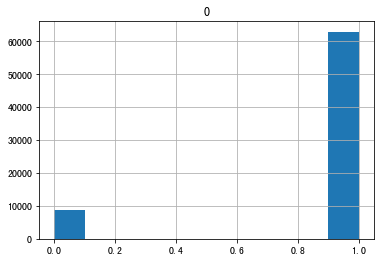

In [10]:
pd.DataFrame(y_train).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1206ddfd0>]],
      dtype=object)

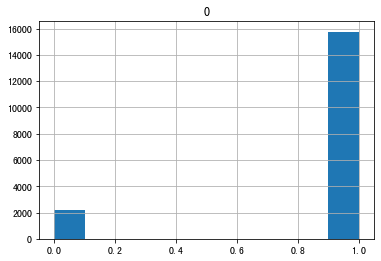

In [9]:
pd.DataFrame(y_test).hist()

##### SVM

In [11]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)
joblib.dump(svm_clf, 'svm.model')

['svm.model']

In [13]:
svm_clf = joblib.load('svm.model')
y_predicts = svm_clf.predict(X_test)

In [118]:
svm_clf.score(X_test, y_test)

0.9097807286726552

In [22]:
from sklearn import metrics

In [46]:
def evaluate(y_true, y_pred):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.precision_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)

    print('accuracy:{:.4f}, precision:{:.4f}, recall:{:.4f}, f1:{:.4f}'.format(
        accuracy, precision, recall, f1))

In [47]:
evaluate(y_test, y_predicts)

accuracy:0.9098, precision:0.9107, recall:0.9107, f1:0.9510


##### XGBOOST

In [30]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
joblib.dump(xgb_clf, 'xgb.model')

['xgb.model']

In [33]:
xgb_clf = joblib.load('xgb.model')
y_pred_xgb = xgb_clf.predict(X_test)

In [48]:
evaluate(y_test, y_pred_xgb)

accuracy:0.9160, precision:0.9241, recall:0.9241, f1:0.9538


### Congratulations! You have completed all assignments in this week. The question below is optional. If you still have time, why don't try it out.

## Option:

#### Try differnt machine learning algorithms with different combinations of parameters in the practical part, and compare their performances (Better use some visualization techiniques).

In [56]:
# data visualization

In [70]:
from sklearn.manifold import TSNE
import seaborn as sns

In [69]:
tsne = TSNE(random_state=1, n_iter=1000, metric='cosine')
embs = tsne.fit_transform(X_train[:10000], y[:10000])

In [93]:
df = pd.concat([pd.DataFrame(embs), pd.DataFrame(y[:len(embs)])], axis=1)
df.columns = ['x1', 'x2', 'y']

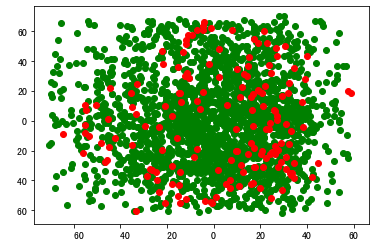

In [112]:
plt.scatter(df[df.y==0].sample(2000)['x1'], df[df.y==0].sample(2000)['x2'], c='g')
plt.scatter(df[df.y==1]['x1'], df[df.y==1]['x2'], c='r')

##### SVM 

In [119]:
from sklearn import model_selection

In [114]:
svm_clf = joblib.load('svm.model')

In [121]:
model_selection.cross_val_score?